In [ ]:
# Gerekli kütüphaneleri yükler
!pip install pandas matplotlib scikit-learn

Selected Features: Index(['year', 'month', 'week', 'is_month_end', 'quarter', 'is_quarter_end',
       'is_year_end', 'Store', 'Dept', 'IsHoliday'],
      dtype='object')


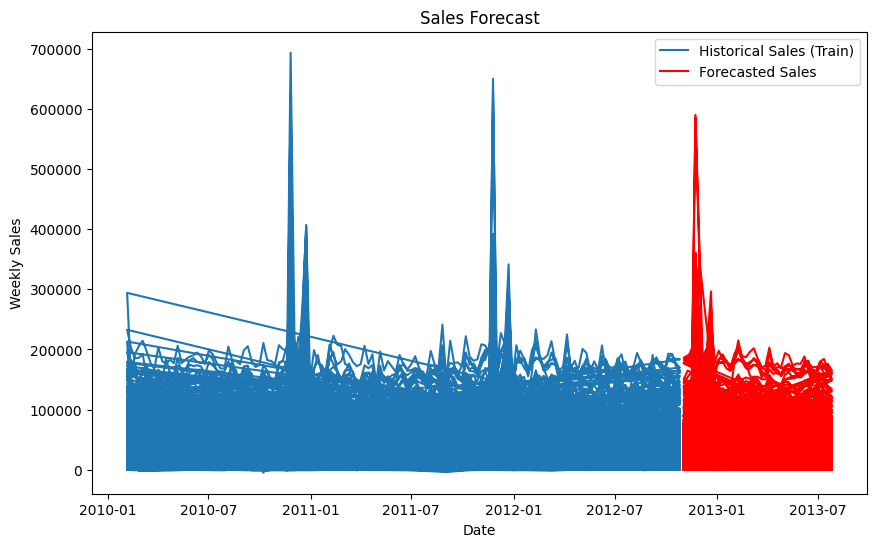

            forecasted_sales
Date                        
2012-11-02        32832.5652
2012-11-09        19079.5996
2012-11-16        19304.9802
2012-11-23        20254.9139
2012-11-30        22668.9885
...                      ...
2013-06-28          687.0128
2013-07-05          674.8362
2013-07-12          691.7600
2013-07-19          767.2721
2013-07-26          683.8698

[115064 rows x 1 columns]


In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Zip dosyasını açar
zip_path = '/content/Sales Forecast.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/sales_data')

# Eğitim ve test verilerini yükler
train_file_path = '/content/sales_data/Sales Forecast/train.csv'
test_file_path = '/content/sales_data/Sales Forecast/test.csv'

train_data = pd.read_csv(train_file_path, parse_dates=['Date'], index_col='Date')
test_data = pd.read_csv(test_file_path, parse_dates=['Date'], index_col='Date')

# Özellik mühendisliği (Feature Engineering)
def create_features(df, label=None):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['week'] = df.index.isocalendar().week
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['is_month_start'] = df.index.is_month_start.astype(int)
    df['is_month_end'] = df.index.is_month_end.astype(int)
    df['quarter'] = df.index.quarter
    df['is_quarter_start'] = df.index.is_quarter_start.astype(int)
    df['is_quarter_end'] = df.index.is_quarter_end.astype(int)
    df['is_year_start'] = df.index.is_year_start.astype(int)
    df['is_year_end'] = df.index.is_year_end.astype(int)
    df['Store'] = df['Store']
    df['Dept'] = df['Dept']
    df['IsHoliday'] = df['IsHoliday'].astype(int)
    X = df[['year', 'month', 'week', 'day', 'dayofweek', 'is_month_start', 'is_month_end',
            'quarter', 'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end',
            'Store', 'Dept', 'IsHoliday']]
    if label:
        y = df[label]
        return X, y
    return X

X_train, y_train = create_features(train_data, label='Weekly_Sales')
X_test = create_features(test_data)  # Test verisi için sadece X değeri oluşturuyoruz

# Veriyi standardize eder
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Özellik seçimi (Feature Selection)
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Seçilen özellikler
selected_features = X_train.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")

# Random Forest modelini eğitme
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_selected, y_train)




Başlangıç tarihini YYYY-MM-DD formatında giriniz: 2013-02-01
Bitiş tarihini YYYY-MM-DD formatında giriniz: 2013-02-08


<ipython-input-7-49d95ba2b508>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year
<ipython-input-7-49d95ba2b508>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
<ipython-input-7-49d95ba2b508>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

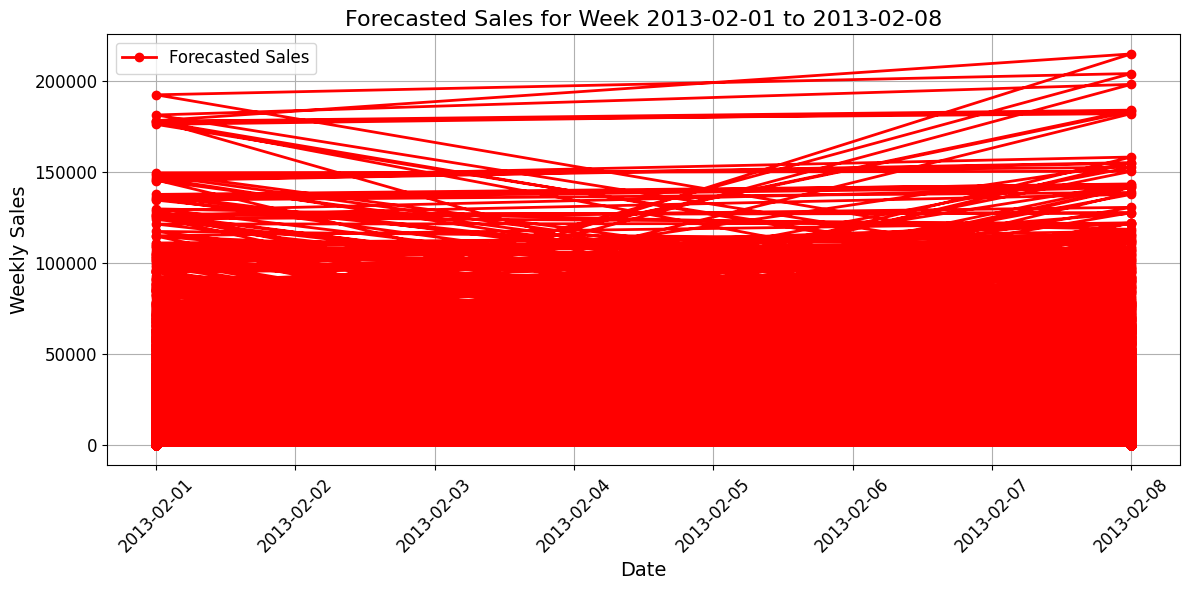

            forecasted_sales
Date                        
2013-02-01        23764.6096
2013-02-08        38165.3093
2013-02-01        52271.1318
2013-02-08        49891.8253
2013-02-01        12090.0745
...                      ...
2013-02-08        51952.3950
2013-02-01         6232.8135
2013-02-08         6493.9471
2013-02-01          745.1952
2013-02-08          765.3158

[5915 rows x 1 columns]


In [ ]:
# Kullanıcıdan başlangıç ve bitiş tarihlerini alma
start_date = input("Başlangıç tarihini YYYY-MM-DD formatında giriniz: ")
end_date = input("Bitiş tarihini YYYY-MM-DD formatında giriniz: ")

# Belirtilen tarih aralığını seçme
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
selected_week_data = test_data[test_data.index.isin(date_range)]

# Seçilen tarih aralığında tahmin yapma
X_selected = create_features(selected_week_data)
X_selected_scaled = scaler.transform(X_selected)
X_selected_selected = selector.transform(X_selected_scaled)
y_pred = model.predict(X_selected_selected)

# Tahmin sonuçlarını görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(selected_week_data.index, y_pred, label='Forecasted Sales', linestyle='-', marker='o', color='red', linewidth=2)
plt.title(f'Forecasted Sales for Week {start_date} to {end_date}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Tahmin sonuçlarını bir DataFrame olarak kaydetme
forecast_df = pd.DataFrame(y_pred, index=selected_week_data.index, columns=['forecasted_sales'])
forecast_df.to_csv('/content/sales_data/Sales Forecast/forecasted_sales.csv')

# Tahmin sonuçlarını yazdırma
print(forecast_df)